In [79]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import folium
import geopy
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim

print('Libraries Imported')

Libraries Imported


### Clustering Venues in Mumbai based on Search Query

In [148]:
# Define Foursquare Credentials

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 150

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


#### First get the Co-Ordinates of Mumbai

In [106]:
address = 'Mumbai'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


In [81]:
latitude, longitude = 18.9387711, 72.8353355

#### Visualize Mumbai on a MAP

In [82]:
folium.Map(location = [latitude, longitude], zoom_start = 11)

#### Enter the Search Query to search for a particular venues

In [83]:
search_query = 'restaurant'
radius = 1500
print(search_query + ' .... OK!')

restaurant .... OK!


In [149]:
# Define url with parameters
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=&client_secret=&ll=18.9387711,72.8353355&v=20180605&query=restaurant&radius=1500&limit=150'

#### Get the response form the foursquare API

In [86]:
results = requests.get(url).json()
#results

In [87]:
results.keys()

dict_keys(['meta', 'response'])

#### Convert the response returned into a data frame for model development

In [135]:
venues_df = json_normalize(results['response']['venues'])
venues_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood
0,5263f0f5498edc1ad5f3270f,Nanumal Bhojraj Restaurant - Fort,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1604770188,False,"Near GPO, Fort, VT",S. Bhagat Singh Road,18.937974,72.837663,"[{'label': 'display', 'lat': 18.93797448587734...",260,400001,IN,Mumbai,Mahārāshtra,India,"[Near GPO, Fort, VT (S. Bhagat Singh Road), Mu...",NaN
1,4e4c0a4122713bd908c641ff,Farhang Restaurant,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1604770188,False,Opposite GPO,Ballard Estate,18.938165,72.837917,"[{'label': 'display', 'lat': 18.93816453050136...",280,NaN,IN,Mumbai,Mahārāshtra,India,"[Opposite GPO (Ballard Estate), Mumbai, Mahārā...",NaN
2,4fb5276be4b0b34b9ac27a1b,Iran Like Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1604770188,False,"Palton Road, Near Haj House",NaN,18.945343,72.836809,"[{'label': 'display', 'lat': 18.94534293649397...",747,400001,IN,Mumbai,Mahārāshtra,India,"[Palton Road, Near Haj House, Mumbai 400001, M...",NaN
3,4d9f2bfe9b91a1cda6c365c0,New Majestic Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1604770188,False,Opp CST,NaN,18.938972,72.835517,"[{'label': 'display', 'lat': 18.93897156089674...",29,NaN,IN,Mumbai,Mahārāshtra,India,"[Opp CST, Mumbai, Mahārāshtra, India]",NaN
4,4f489f23e4b018635344413a,Panchratna restaurant & bar,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1604770188,False,Opp. Metro Cinema,Marine Lines,18.942900,72.826820,"[{'label': 'display', 'lat': 18.94289961203775...",1007,NaN,IN,Mumbai,Mahārāshtra,India,"[Opp. Metro Cinema (Marine Lines), Mumbai, Mah...",NaN


In [136]:
# Let us look at the number of venues returned
venues_df.shape

(50, 18)

In [137]:
results['response']['venues'][0]

{'id': '5263f0f5498edc1ad5f3270f',
 'name': 'Nanumal Bhojraj Restaurant - Fort',
 'location': {'address': 'Near GPO, Fort, VT',
  'crossStreet': 'S. Bhagat Singh Road',
  'lat': 18.937974485877348,
  'lng': 72.83766325414364,
  'labeledLatLngs': [{'label': 'display',
    'lat': 18.937974485877348,
    'lng': 72.83766325414364}],
  'distance': 260,
  'postalCode': '400001',
  'cc': 'IN',
  'city': 'Mumbai',
  'state': 'Mahārāshtra',
  'country': 'India',
  'formattedAddress': ['Near GPO, Fort, VT (S. Bhagat Singh Road)',
   'Mumbai 400001',
   'Mahārāshtra',
   'India']},
 'categories': [{'id': '4bf58dd8d48988d10f941735',
   'name': 'Indian Restaurant',
   'pluralName': 'Indian Restaurants',
   'shortName': 'Indian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1604770188',
 'hasPerk': False}

In [138]:
def get_category(row):
    try:
        return row[0]['name']
    except:
        return np.NaN

#### Cleaning the dataframe and retrieving only the relevant information from it

In [139]:
venues_df = venues_df[['name', 'categories', 'location.address', 'location.lat', 'location.lng', 'location.distance', 'id']]
venues_df['categories'] = venues_df['categories'].apply(get_category)
venues_df.columns = ['Name', 'Categories', 'Address', 'Latitude', 'Longitude', 'Distance', 'Id']
venues_df['Categories'].fillna('Indian Restaurant', inplace = True)
venues_df.head()

,Name,Categories,Address,Latitude,Longitude,Distance,Id
0,Nanumal Bhojraj Restaurant - Fort,Indian Restaurant,"Near GPO, Fort, VT",18.937974,72.837663,260,5263f0f5498edc1ad5f3270f
1,Farhang Restaurant,Steakhouse,Opposite GPO,18.938165,72.837917,280,4e4c0a4122713bd908c641ff
2,Iran Like Restaurant,Indian Restaurant,"Palton Road, Near Haj House",18.945343,72.836809,747,4fb5276be4b0b34b9ac27a1b
3,New Majestic Restaurant,Indian Restaurant,Opp CST,18.938972,72.835517,29,4d9f2bfe9b91a1cda6c365c0
4,Panchratna restaurant & bar,Indian Restaurant,Opp. Metro Cinema,18.942900,72.826820,1007,4f489f23e4b018635344413a


In [140]:
# Explore venues from each category
venues_df['Categories'].value_counts()

Indian Restaurant                  22
Restaurant                          4
Asian Restaurant                    4
Steakhouse                          2
Bar                                 2
Chinese Restaurant                  2
Afghan Restaurant                   1
Southern / Soul Food Restaurant     1
Fast Food Restaurant                1
Vegetarian / Vegan Restaurant       1
Irani Cafe                          1
Hotel Bar                           1
Seafood Restaurant                  1
Food                                1
BBQ Joint                           1
Snack Place                         1
Lounge                              1
Cantonese Restaurant                1
Punjabi Restaurant                  1
Mughlai Restaurant                  1
Name: Categories, dtype: int64

#### Visualize the nearby venues on a MAP

In [93]:
mumbai_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

# Display your loc
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Your Loc',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(mumbai_map)

# Display Venues
for lat, lng in zip(venues_df.Latitude, venues_df.Longitude):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'yellow',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(mumbai_map)
    
# Display popup text
for lat, lng, label in zip(venues_df.Latitude, venues_df.Longitude, venues_df.Name):
    folium.Marker(
        [lat, lng],
        popup = label
    ).add_to(mumbai_map)


mumbai_map

### Exploring the Venues

#### Function to return all the venues located nearby these venues

In [94]:
def getNearbyVenues(names, latitudes, longitudes, radius = 500, limit = 100):
    venues_list = []
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
        
        # Get the result
        venues = requests.get(url).json()['response']['groups'][0]['items']
        
        for venue in venues:
            venues_list.append([(
                name, 
                lat, 
                lng,
                venue['venue']['name'],
                venue['venue']['categories'][0]['name'],
                venue['venue']['location']['lat'],
                venue['venue']['location']['lng']
            )])
    
    nearby_venues_df = pd.DataFrame(venues_list)
    
    return(nearby_venues_df)

In [95]:
# Get all the venues
mumbai_venues = getNearbyVenues(
    names = venues_df['Name'],
    latitudes = venues_df['Latitude'],
    longitudes = venues_df['Longitude']
)

#### Cleaning the dataframe and retrieving only the relevant information from it

In [96]:
mumbai_venues['Venue'] = mumbai_venues.apply(lambda x: x[0][0], axis = 1)
mumbai_venues['Venue Latitude'] = mumbai_venues.apply(lambda x: x[0][1], axis = 1)
mumbai_venues['Venue Longitude'] = mumbai_venues.apply(lambda x: x[0][2], axis = 1)
mumbai_venues['Neighbourhood Name'] = mumbai_venues.apply(lambda x: x[0][3], axis = 1)
mumbai_venues['Neighbourhood Category'] = mumbai_venues.apply(lambda x: x[0][4], axis = 1)
mumbai_venues['Neighbourhood Latitude'] = mumbai_venues.apply(lambda x: x[0][5], axis = 1)
mumbai_venues['Neighbourhood Longitude'] = mumbai_venues.apply(lambda x: x[0][6], axis = 1)
mumbai_venues.drop(0, axis = 1, inplace = True)

In [97]:
mumbai_venues.head()

,Venue,Venue Latitude,Venue Longitude,Neighbourhood Name,Neighbourhood Category,Neighbourhood Latitude,Neighbourhood Longitude
0,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853
1,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Dakshin Bar And Kitchen,Seafood Restaurant,18.936489,72.837490
2,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Café Universal,Irani Cafe,18.936021,72.837453
3,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Britannia & Co.,Parsi Restaurant,18.934683,72.840183
4,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Town House Cafe,Bar,18.938550,72.833464


In [98]:
# Let us look at the total neighbourhood returned
mumbai_venues.shape

(1613, 7)

##### Group each neighbourhood by Venues

In [99]:
mumbai_venues.groupby('Venue').count().head()

,Venue Latitude,Venue Longitude,Neighbourhood Name,Neighbourhood Category,Neighbourhood Latitude,Neighbourhood Longitude
Venue,,,,,,
Abhiruchi Restaurant,12,12,12,12,12,12
Ankur restaurant,77,77,77,77,77,77
Anubhav Restaurant & Bar,25,25,25,25,25,25
Aram Restaurant,14,14,14,14,14,14
Army restaurant,76,76,76,76,76,76


In [100]:
# Total Number of Unique Categories
print('There are total of {} unique categories'.format(len(mumbai_venues['Neighbourhood Category'].unique())))

There are total of 84 unique categories


### Analyze Each Neighbourhood

In [101]:
mumbai_venues_onehot = pd.get_dummies(mumbai_venues[['Neighbourhood Category']], prefix = '', prefix_sep = '')

# Add venues column
mumbai_venues_onehot['Venue'] = mumbai_venues['Venue']

# Move the venues column to first index
mumbai_venues_onehot = mumbai_venues_onehot[[mumbai_venues_onehot.columns[-1]] + list(mumbai_venues_onehot.columns[:-1])]

mumbai_venues_onehot.head()

,Venue,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Seafood Restaurant,Smoke Shop,Stadium,Steakhouse,Tea Room,Tourist Information Center,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [102]:
mumbai_grpd = mumbai_venues_onehot.groupby('Venue').mean().reset_index()

mumbai_grpd.head()

,Venue,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Seafood Restaurant,Smoke Shop,Stadium,Steakhouse,Tea Room,Tourist Information Center,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Abhiruchi Restaurant,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.083333,0.000000
1,Ankur restaurant,0.000000,0.012987,0.012987,0.012987,0.000000,0.012987,0.012987,0.000000,0.012987,...,0.038961,0.012987,0.0,0.012987,0.012987,0.0,0.000000,0.025974,0.000000,0.012987
2,Anubhav Restaurant & Bar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.080000,0.000000,0.0,0.000000,0.000000,0.0,0.040000,0.000000,0.000000,0.000000
3,Aram Restaurant,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.142857,...,0.071429,0.000000,0.0,0.000000,0.000000,0.0,0.071429,0.000000,0.000000,0.000000
4,Army restaurant,0.000000,0.000000,0.013158,0.013158,0.000000,0.000000,0.026316,0.013158,0.013158,...,0.026316,0.013158,0.0,0.013158,0.013158,0.0,0.013158,0.026316,0.000000,0.000000


### Cluster Neighbourhoods

In [103]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

#### Choosing the Best Number of Cluster

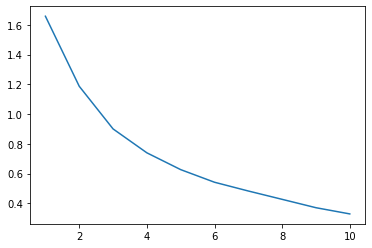

In [104]:
wcss = []

for i in range(1, 11):
    
    kmeans_i = KMeans(init = 'k-means++', n_clusters = i, random_state = 0)
    kmeans_i.fit(mumbai_grpd.drop('Venue', axis = 1))
    
    wcss.append(kmeans_i.inertia_)

plt.plot(range(1, 11), wcss)
    

In [105]:
wcss

[1.6583381970429272,
 1.187349680500691,
 0.9005365069019025,
 0.739691905690186,
 0.6266493845943079,
 0.5417850713987311,
 0.4828669467034515,
 0.42678870195418106,
 0.3704882690264285,
 0.32874968442085317]

##### Clearly from the elbow method <code>number of clusters</code> should be <code>5</code>

### Clustering Using 5 clusters

In [106]:
klstr = 5

kmeans = KMeans(n_clusters = klstr, random_state = 0, init = 'k-means++')
kmeans.fit(mumbai_grpd.drop('Venue', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [107]:
kmeans.labels_, kmeans.inertia_

(array([2, 1, 4, 4, 1, 1, 4, 1, 4, 2, 1, 4, 4, 1, 1, 0, 4, 4, 1, 2, 4, 0,
        4, 3, 1, 3, 1, 3, 4, 3, 2, 1, 4, 1, 4, 4, 1, 3, 4, 2, 4, 4, 0, 0,
        2, 3, 2, 0, 3, 3], dtype=int32),
 0.6266493845943079)

### Add the labels to the dataframe

In [144]:
mumbai_grpd.drop('Cluster Labels', axis = 1, inplace = True)

In [145]:
mumbai_grpd.insert(1, 'Cluster Labels', kmeans.labels_)

# Extract the labels to form a new df
labels_df = mumbai_grpd[['Venue', 'Cluster Labels']]
labels_df.columns = ['Name', 'Cluster Labels']
labels_df.head()

,Name,Cluster Labels
0,Abhiruchi Restaurant,2
1,Ankur restaurant,1
2,Anubhav Restaurant & Bar,4
3,Aram Restaurant,4
4,Army restaurant,1


## Add cluster labels to the original venues dataframe

In [146]:
venues_df = pd.merge(venues_df, labels_df, on = 'Name')
venues_df.head()

,Name,Categories,Address,Latitude,Longitude,Distance,Id,Cluster Labels
0,Nanumal Bhojraj Restaurant - Fort,Indian Restaurant,"Near GPO, Fort, VT",18.937974,72.837663,260,5263f0f5498edc1ad5f3270f,4
1,Farhang Restaurant,Steakhouse,Opposite GPO,18.938165,72.837917,280,4e4c0a4122713bd908c641ff,4
2,Iran Like Restaurant,Indian Restaurant,"Palton Road, Near Haj House",18.945343,72.836809,747,4fb5276be4b0b34b9ac27a1b,2
3,New Majestic Restaurant,Indian Restaurant,Opp CST,18.938972,72.835517,29,4d9f2bfe9b91a1cda6c365c0,4
4,Panchratna restaurant & bar,Indian Restaurant,Opp. Metro Cinema,18.942900,72.826820,1007,4f489f23e4b018635344413a,3


## Visualize the Cluster

In [147]:
cluster_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

x = np.arange(klstr)
ys = [i + x + (i*x)**2 for i in range(klstr)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))

rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lng, hood, cluster in zip(venues_df['Latitude'], venues_df['Longitude'], venues_df['Name'], venues_df['Cluster Labels']):
    label = str(hood) + ', Cluster ' + str(cluster)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = 'yellow',
        fill_opacity = 0.7
    ).add_to(cluster_map)


cluster_map